In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error

In [10]:
housing_data = california_housing.fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
print(Features)
print(Target)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [15]:
df = Features.join(Target)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [20]:
df[['MedInc', 'Target']].describe() #df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


In [21]:
'''
It seems that Target has some outliers (as well as MedInc), 
because 75% of the data has price less than 2.65, 
but maximum price go as high as 5. 

We're going to remove extremely expensive houses as they will add unnecessary noise to the data.
'''
df = df[df.Target < 3.5]
df = df[df.MedInc < 8]

In [22]:
df[['MedInc', 'Target']].describe() #df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
count,17938.000000,17938.000000
mean,3.482030,1.722805
std,1.364922,0.749957
min,0.499900,0.149990
25%,2.452025,1.119000
50%,3.303600,1.635000
75%,4.346050,2.256000
max,7.988700,3.499000


In [29]:
'''
cale MedInc and Target variables to [0-1]
'''
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

X = scale(df.MedInc)
y = scale(df.Target)

X.max(), y.max() # features are scaled now

(1.0, 1.0)

<ipython-input-32-7a30a73234e1>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Positive Correlation Between Income and House Price', fontSize=15)
<ipython-input-32-7a30a73234e1>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Income', fontSize=12)
<ipython-input-32-7a30a73234e1>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('House Price', fontSize=12)


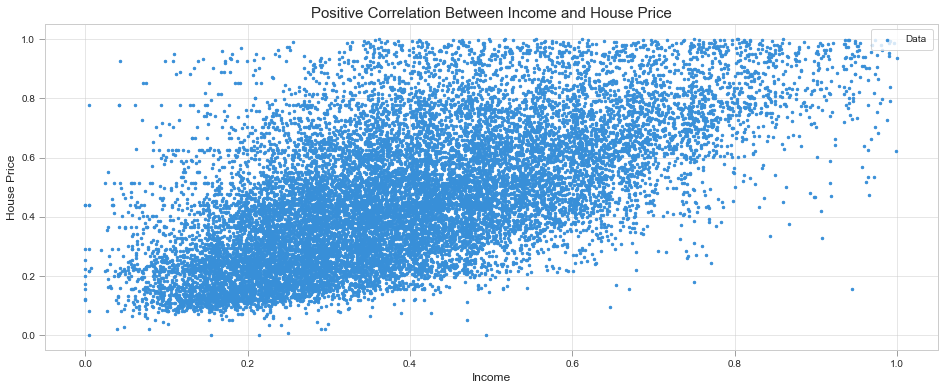

In [32]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn-whitegrid')
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Positive Correlation Between Income and House Price', fontSize=15)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

In [57]:
'''
Univariate linear regression
'''
class univariateLinearRegression:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = (np.mean(X)*np.mean(y) - np.mean(X*y)) / (np.mean(X)**2 - np.mean(X**2))
        self.b = np.mean(y) - self.m*np.mean(X)
    
    def predict(self):
        self.y_pred = self.m*self.X + self.b
        return self.y_pred
    
    def coeffs(self):
        return self.m, self.b
    
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [42]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('Income', fontSize=11)
    plt.ylabel('Price', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

3        2.464104
4        1.847724
5        1.913105
6        1.783545
7        1.598621
           ...   
20635    1.063607
20636    1.405430
20637    1.111527
20638    1.168881
20639    1.347733
Name: MedInc, Length: 17938, dtype: float64
mean_squared_error:  0.34320521502255963


<ipython-input-42-564af7b1f62e>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(title, fontSize=14)
<ipython-input-42-564af7b1f62e>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Income', fontSize=11)
<ipython-input-42-564af7b1f62e>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Price', fontSize=11)


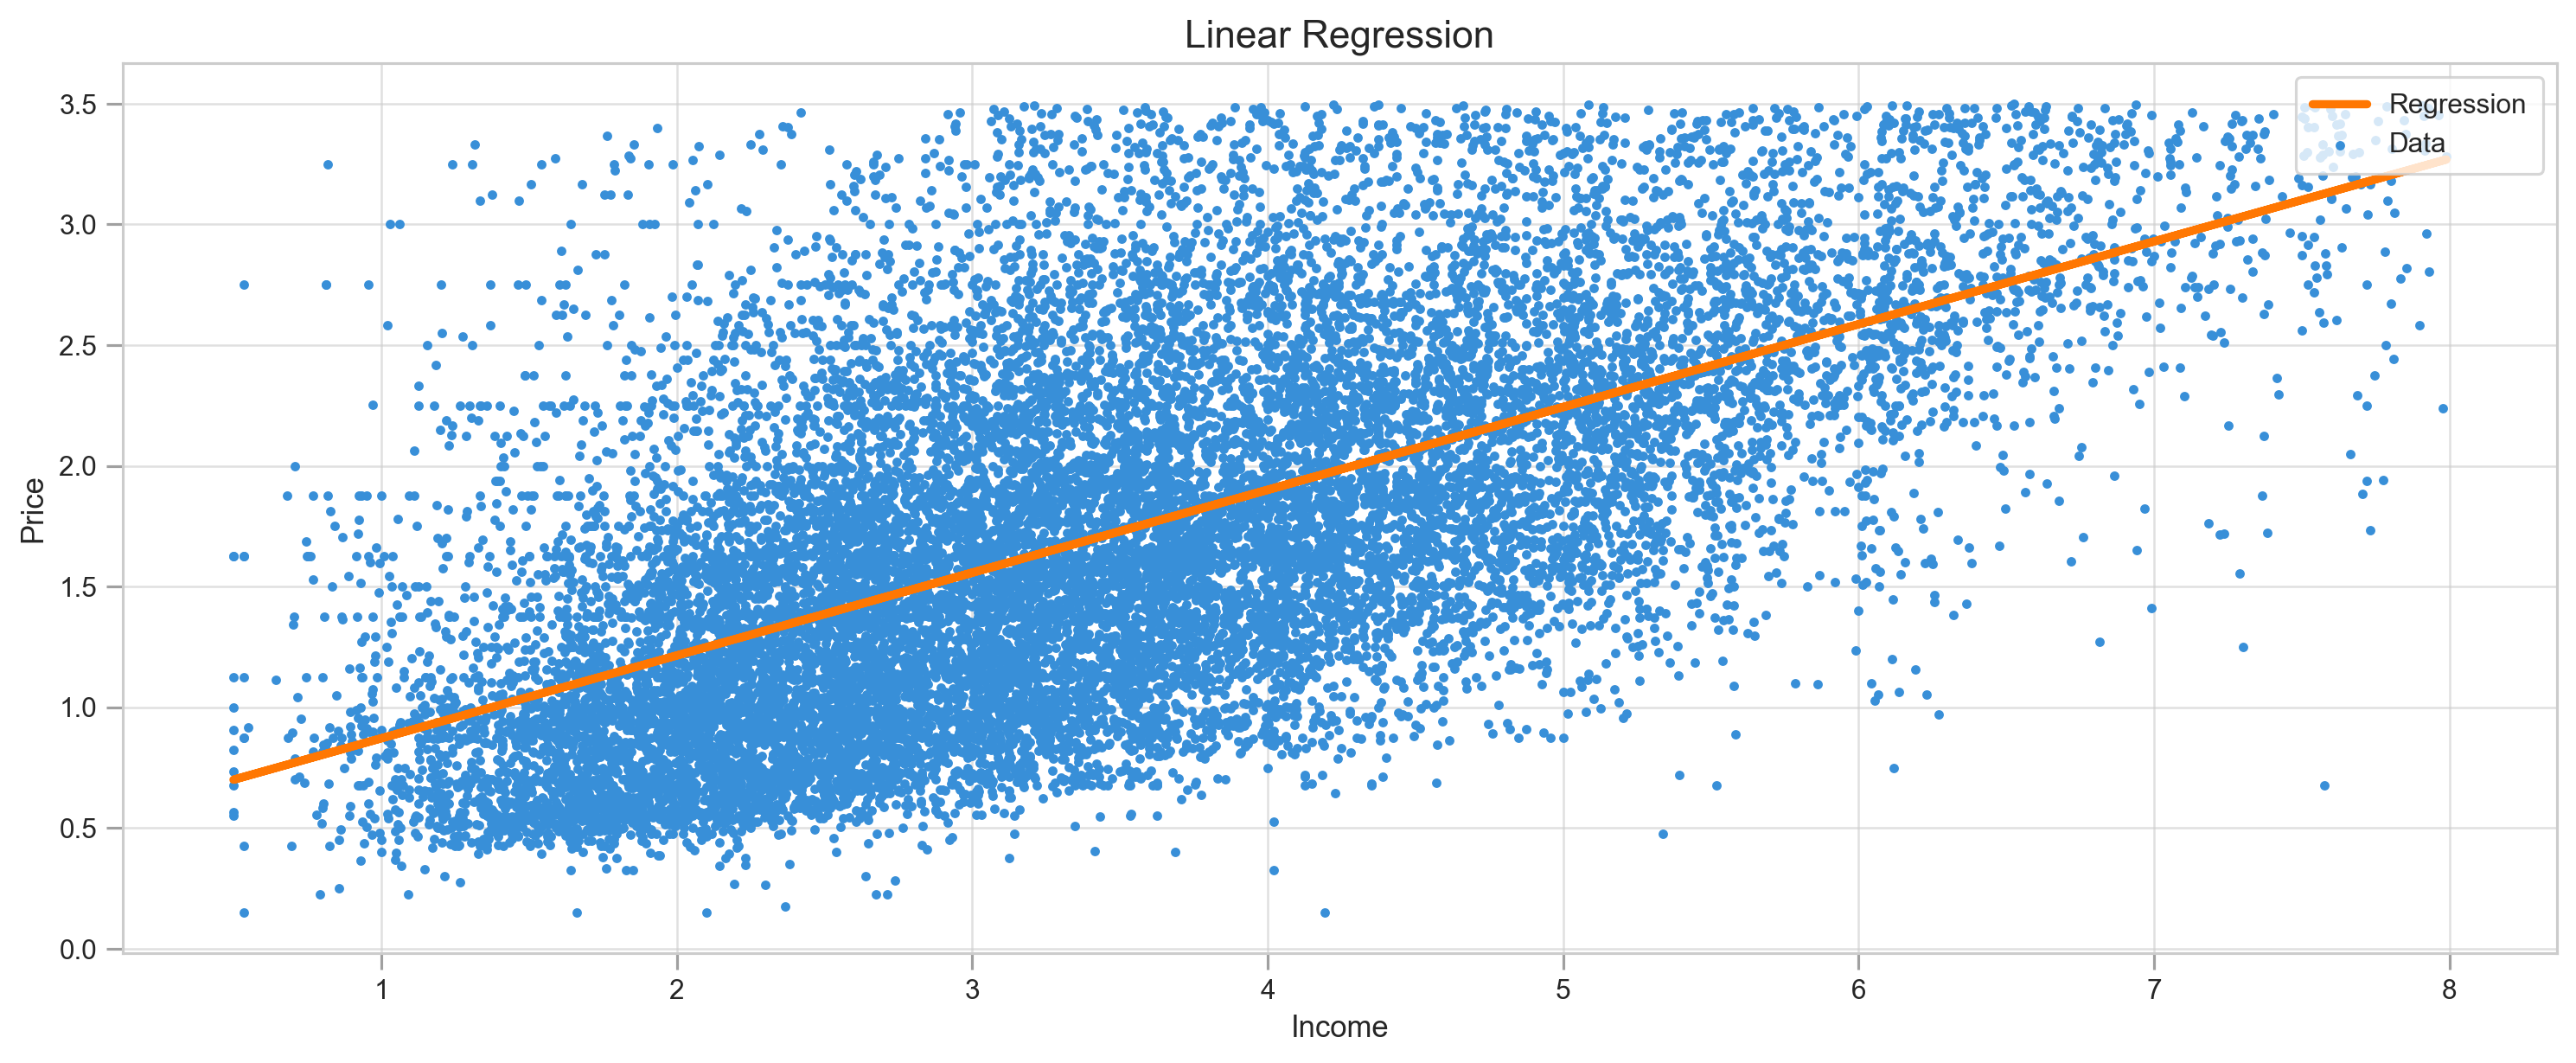

In [54]:
X = df.MedInc
y = df.Target
lr = univariateLinearRegression()
lr.fit(X,y)
y_pred = lr.predict()
print(y_pred)
print("mean_squared_error: ", mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, title="Linear Regression")

In [56]:
'''
Multi-variate Linear regression

Similar to from sklearn.linear_model import LinearRegression, 
we can calculate coefficients with Least Squares method. 

Numpy can calculate this formula almost instantly (of course depends on the amount of data) and precise.
'''
X = df.drop('Target', axis=1) # matrix A, or all the features
y = df.Target
X, y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
 6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
 7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 3    

In [61]:
type(X), type(np.array(X))

(pandas.core.frame.DataFrame, numpy.ndarray)

In [66]:
np.array(X), X.T.dot(X)

(array([[   5.6431    ,   52.        ,    5.8173516 , ...,    2.54794521,
           37.85      , -122.25      ],
        [   3.8462    ,   52.        ,    6.28185328, ...,    2.18146718,
           37.85      , -122.25      ],
        [   4.0368    ,   52.        ,    4.76165803, ...,    2.13989637,
           37.85      , -122.25      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([[ 2.50906711e+05,  1.68629743e+06,  3.47209391e+05,
          6.79132338e+04,  9.27581368e+07,  1.91550628e+05,
          2.22355055e+06, -7.46585047e+06],
        [ 1.68629743e+06,  1.69125530e+07,  2.57766400e+06,
          5.45236902e+05,  6.58209148e+08,  1.55420187e+06,
          1.79775

In [62]:
X = np.array(X)
y = np.array(y)
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)